In [92]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy import stats

In [93]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)

In [142]:
def GetBasics(df):
    return df.Filter("n_truthtracks == 1")\
             .Define("nDCHits", "n_hits_d0+n_hits_d2+n_hits_d3p+n_hits_d3m")\
             .Define("tpx", "gpx[0]")\
             .Define("tpy", "gpy[0]")\
             .Define("tpz", "gpz[0]")\
             .Define("TTpzDiff", "truthtrack_rectrack_id[0] > -1 ? truthtrack_pz_st3[0] - track_pz_st3[truthtrack_rectrack_id[0]] : -1000.")\
             .Define("TTpxDiff", "truthtrack_rectrack_id[0] > -1 ? truthtrack_px_st3[0] - track_px_st3[truthtrack_rectrack_id[0]] : -1000.")\
             .Define("TTpyDiff", "truthtrack_rectrack_id[0] > -1 ? truthtrack_py_st3[0] - track_py_st3[truthtrack_rectrack_id[0]] : -1000.")\
             .Define("nFakes", "n_tracks == 3 ? n_tracks - (int(bool(track_matched[0])) + int(bool(track_matched[1])) + int(bool(track_matched[2]))) : \
                                n_tracks == 2 ? n_tracks - (int(bool(track_matched[0])) + int(bool(track_matched[1]))) : \
                                n_tracks == 1 ? n_tracks - int(bool(track_matched[0])) : 0")\
             .Define("nTrues", "n_tracks == 3 ? int(bool(track_matched[0])) + int(bool(track_matched[1])) + int(bool(track_matched[2])) : \
                                n_tracks == 2 ? int(bool(track_matched[0])) + int(bool(track_matched[1])) : \
                                n_tracks == 1 ? int(bool(track_matched[0])) : 0")
             #.Define("nFakeDM", "n_dimuons - recoTDM")
             #.Define("recoTDM_HitRes", "\
                                         #(n_hits_d0 < 300 && n_hits_d2 < 300 && n_hits_d3p < 300 && n_hits_d3m < 300) ? \
                                         #int(truthtrack_rectrack_id.size() ==2 && truthtrack_rectrack_id[0] > -1 \
                                         #&& truthtrack_rectrack_id[1] > -1 && n_dimuons == 1) : \
                                         #0")\

In [143]:
def HitRes(df):
    return df.Filter(\
            "n_hits_d0 < 300 && n_hits_d2 < 300 && n_hits_d3p < 300 && n_hits_d3m < 300")

In [144]:
def PosRes(df):
    return df.Filter(\
            "abs(truthtrack_x_st3[0]) < 100 && abs(truthtrack_y_st3[0]) < 100 \
            && abs(truthtrack_x_st3[1]) < 100 && abs(truthtrack_y_st3[1]) < 100 \
            && abs(truthtrack_x_st3[0]) > 0.0001 && abs(truthtrack_y_st3[0]) > 0.0001 \
            && abs(truthtrack_x_st3[1]) > 0.0001 && abs(truthtrack_y_st3[1]) > 0.0001")

In [145]:
def DMRes(df):
    return df.Filter(\
                    "n_tracks > 0")

In [161]:
def dfToPDF(df):
    gb = GetBasics(df)
    npy = gb.AsNumpy(columns=["truthtrack_rectrack_id",\
                      "allRecoed",\
                      "tpx",\
                      "tpy",\
                      "tpz",\
                      "TTpzDiff",\
                      "TTpxDiff",\
                      "TTpyDiff",\
                      "totalTime",\
                      "nDCHits",\
                      "track_matched",\
                      "nFakes",\
                      "nTrues",\
                      "n_hits_d0",\
                      "track_matched",\
                      "numNonMatched",\
                      "nFakeTracksTop2",\
                      "mainDMRecoed"
                      ])
    return pandas.DataFrame(npy)

In [162]:
def dfToPDFHitRes(df):
    HR = HitRes(df)
    return dfToPDF(HR)

In [163]:
def dfToPDFPosRes(df):
    PR = PosRes(df)
    return dfToPDF(PR)

In [164]:
def dfToPDFDMRes(df):
    PR = DMRes(df)
    return dfToPDF(PR)

In [165]:
def EffPlotInfo(X, Y, binsDef=20):
    bin_means, bin_edges, binnumber = stats.binned_statistic(X, Y, statistic='mean',bins=binsDef)
    bin_stds, bin_edges, binnumber = stats.binned_statistic(X, Y, statistic='std',bins=binsDef)
    counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,len(bin_means)+1,1)]
    return bin_edges,bin_means,bin_stds,counts

In [166]:
def EffPlotInfoCount(X, Y, binsDef=20):
    bin_means, bin_edges, binnumber = stats.binned_statistic(X, Y, statistic='count',bins=binsDef)
    bin_stds, bin_edges, binnumber = stats.binned_statistic(X, Y, statistic='std',bins=binsDef)
    counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,len(bin_means)+1,1)]
    return bin_edges,bin_means,bin_stds,counts

In [167]:
df_withEmbedNew = ROOT.RDataFrame("Events", "embedded_sample/Mar14_samples/muonGun_NEW_ACC_FULL.root")
df_withEmbedNew_noEmu = ROOT.RDataFrame("Events", "embedded_sample/Mar14_samples/muonGun_NEW_ACC_NOEMU_FULL.root")

In [168]:
#df_noEmbedNew = ROOT.RDataFrame("Events", "embedded_sample/Mar14_samples/DY_noEmbed_NEW_FULL_Mar14.root")

In [169]:
df_withEmbedOld = ROOT.RDataFrame("Events", "embedded_sample/Mar14_samples/muonGun_OLD_ACC_FULL.root")
df_withEmbedOld_noEmu = ROOT.RDataFrame("Events", "embedded_sample/Mar14_samples/muonGun_OLD_ACC_NOEMU_FULL.root")

In [170]:
#df_noEmbedOld = ROOT.RDataFrame("Events", "embedded_sample/Mar14_samples/DY_noEmbed_OLD_FULL_Mar14.root")

In [171]:
pdf_withEmbedNew = dfToPDF(df_withEmbedNew)
pdf_withEmbedNew_noEmu = dfToPDF(df_withEmbedNew_noEmu)
#pdf_withEmbedNew_HitRes = dfToPDFHitRes(df_withEmbedNew)
#pdf_withEmbedNew_PosRes = dfToPDFPosRes(df_withEmbedNew)
#pdf_withEmbedNew_DMRes = dfToPDFDMRes(df_withEmbedNew)

In [172]:
#pdf_noEmbedNew = dfToPDF(df_noEmbedNew)
#pdf_noEmbedNew_PosRes = dfToPDFPosRes(df_noEmbedNew)

In [173]:
pdf_withEmbedOld = dfToPDF(df_withEmbedOld)
pdf_withEmbedOld_noEmu = dfToPDF(df_withEmbedOld_noEmu)
#pdf_withEmbedOld_HitRes = dfToPDFHitRes(df_withEmbedOld)
#pdf_withEmbedOld_PosRes = dfToPDFPosRes(df_withEmbedOld)
#pdf_withEmbedOld_DMRes = dfToPDFDMRes(df_withEmbedOld)

In [159]:
#pdf_noEmbedOld = dfToPDF(df_noEmbedOld)
#pdf_noEmbedOldPosRes = dfToPDFPosRes(df_noEmbedOld)

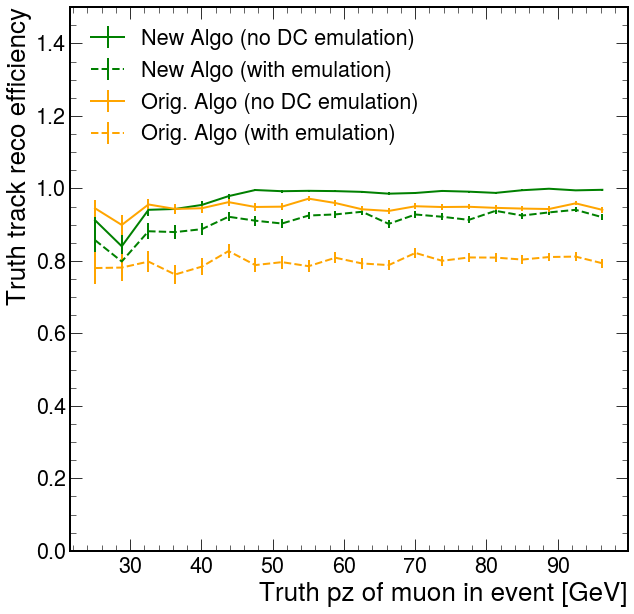

In [202]:
Xvals = "tpz"
Info = EffPlotInfo(pdf_withEmbedNew[Xvals].to_numpy(), pdf_withEmbedNew["allRecoed"].to_numpy())
Info_ne = EffPlotInfo(pdf_withEmbedNew_noEmu[Xvals].to_numpy(), pdf_withEmbedNew_noEmu["allRecoed"].to_numpy())
InfoOld = EffPlotInfo(pdf_withEmbedOld[Xvals].to_numpy(), pdf_withEmbedOld["allRecoed"].to_numpy())
InfoOld_ne = EffPlotInfo(pdf_withEmbedOld_noEmu[Xvals].to_numpy(), pdf_withEmbedOld_noEmu["allRecoed"].to_numpy())
plt.errorbar(Info_ne[0][:20], Info_ne[1], Info_ne[2]/np.sqrt(Info_ne[3]), color='g', lw=2, label='New Algo (no DC emulation)')
plt.errorbar(Info[0][:20], Info[1], Info[2]/np.sqrt(Info[3]), color='g', linestyle='--', lw=2, label='New Algo (with emulation)')
plt.errorbar(InfoOld_ne[0][:20], InfoOld_ne[1], InfoOld_ne[2]/np.sqrt(InfoOld_ne[3]), color='orange', lw=2, label='Orig. Algo (no DC emulation)')
plt.errorbar(InfoOld[0][:20], InfoOld[1], InfoOld[2]/np.sqrt(InfoOld[3]), color='orange', linestyle='--', lw=2, label='Orig. Algo (with emulation)')
plt.xlabel('Truth pz of muon in event [GeV]')
plt.ylabel('Truth track reco efficiency')
plt.ylim([0,1.5])
plt.legend(loc='upper left')

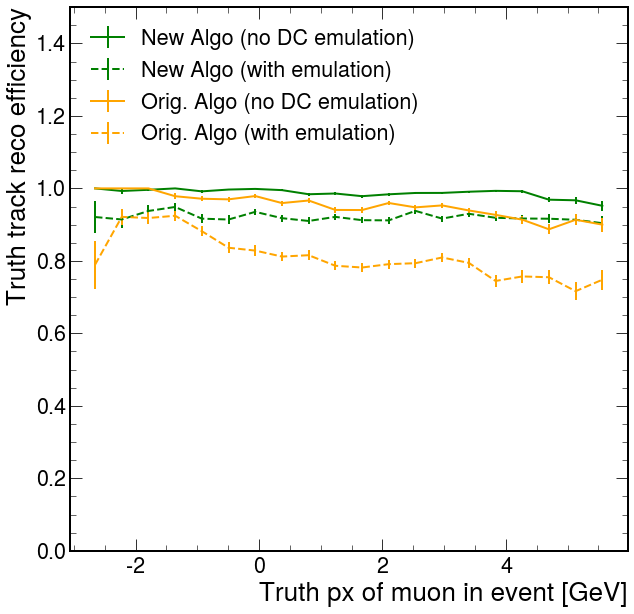

In [201]:
Xvals = "tpx"
Info = EffPlotInfo(pdf_withEmbedNew[Xvals].to_numpy(), pdf_withEmbedNew["allRecoed"].to_numpy())
Info_ne = EffPlotInfo(pdf_withEmbedNew_noEmu[Xvals].to_numpy(), pdf_withEmbedNew_noEmu["allRecoed"].to_numpy())
InfoOld = EffPlotInfo(pdf_withEmbedOld[Xvals].to_numpy(), pdf_withEmbedOld["allRecoed"].to_numpy())
InfoOld_ne = EffPlotInfo(pdf_withEmbedOld_noEmu[Xvals].to_numpy(), pdf_withEmbedOld_noEmu["allRecoed"].to_numpy())
plt.errorbar(Info_ne[0][:20], Info_ne[1], Info_ne[2]/np.sqrt(Info_ne[3]), color='g', lw=2, label='New Algo (no DC emulation)')
plt.errorbar(Info[0][:20], Info[1], Info[2]/np.sqrt(Info[3]), color='g', linestyle='--', lw=2, label='New Algo (with emulation)')
plt.errorbar(InfoOld_ne[0][:20], InfoOld_ne[1], InfoOld_ne[2]/np.sqrt(InfoOld_ne[3]), color='orange', lw=2, label='Orig. Algo (no DC emulation)')
plt.errorbar(InfoOld[0][:20], InfoOld[1], InfoOld[2]/np.sqrt(InfoOld[3]), color='orange', linestyle='--', lw=2, label='Orig. Algo (with emulation)')
plt.xlabel('Truth px of muon in event [GeV]')
plt.ylabel('Truth track reco efficiency')
plt.ylim([0,1.5])
plt.legend(loc='upper left')

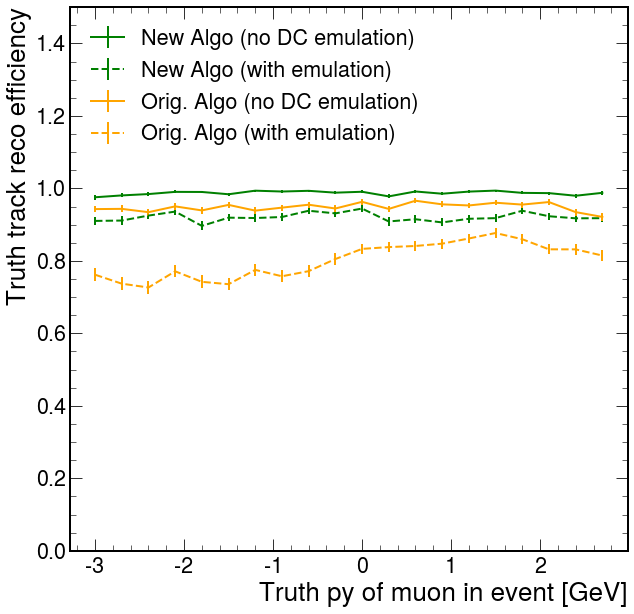

In [200]:
Xvals = "tpy"
Info = EffPlotInfo(pdf_withEmbedNew[Xvals].to_numpy(), pdf_withEmbedNew["allRecoed"].to_numpy())
Info_ne = EffPlotInfo(pdf_withEmbedNew_noEmu[Xvals].to_numpy(), pdf_withEmbedNew_noEmu["allRecoed"].to_numpy())
InfoOld = EffPlotInfo(pdf_withEmbedOld[Xvals].to_numpy(), pdf_withEmbedOld["allRecoed"].to_numpy())
InfoOld_ne = EffPlotInfo(pdf_withEmbedOld_noEmu[Xvals].to_numpy(), pdf_withEmbedOld_noEmu["allRecoed"].to_numpy())
plt.errorbar(Info_ne[0][:20], Info_ne[1], Info_ne[2]/np.sqrt(Info_ne[3]), color='g', lw=2, label='New Algo (no DC emulation)')
plt.errorbar(Info[0][:20], Info[1], Info[2]/np.sqrt(Info[3]), color='g', linestyle='--', lw=2, label='New Algo (with emulation)')
plt.errorbar(InfoOld_ne[0][:20], InfoOld_ne[1], InfoOld_ne[2]/np.sqrt(InfoOld_ne[3]), color='orange', lw=2, label='Orig. Algo (no DC emulation)')
plt.errorbar(InfoOld[0][:20], InfoOld[1], InfoOld[2]/np.sqrt(InfoOld[3]), color='orange', linestyle='--', lw=2, label='Orig. Algo (with emulation)')
plt.xlabel('Truth py of muon in event [GeV]')
plt.ylabel('Truth track reco efficiency')
plt.ylim([0,1.5])
plt.legend(loc='upper left')

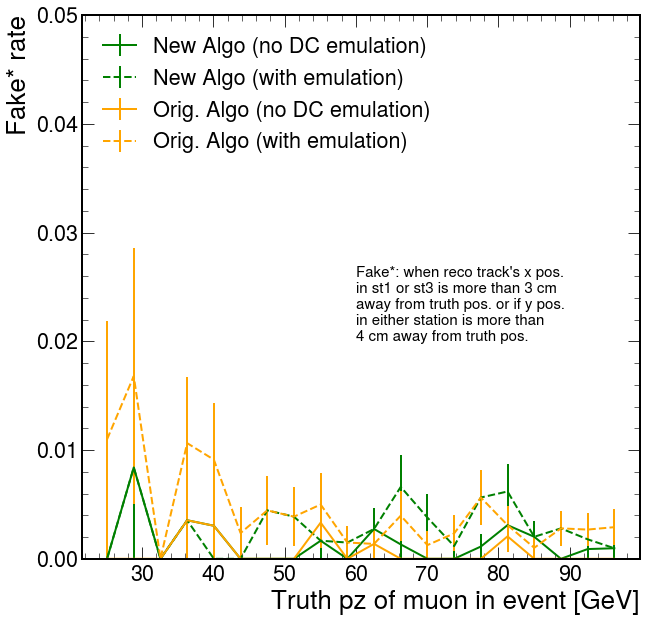

In [199]:
Xvals = "tpz"
Info = EffPlotInfo(pdf_withEmbedNew[Xvals].to_numpy(), pdf_withEmbedNew["nFakeTracksTop2"].to_numpy())
Info_ne = EffPlotInfo(pdf_withEmbedNew_noEmu[Xvals].to_numpy(), pdf_withEmbedNew_noEmu["nFakeTracksTop2"].to_numpy())
InfoOld = EffPlotInfo(pdf_withEmbedOld[Xvals].to_numpy(), pdf_withEmbedOld["nFakeTracksTop2"].to_numpy())
InfoOld_ne = EffPlotInfo(pdf_withEmbedOld_noEmu[Xvals].to_numpy(), pdf_withEmbedOld_noEmu["nFakeTracksTop2"].to_numpy())
plt.errorbar(Info_ne[0][:20], Info_ne[1], Info_ne[2]/np.sqrt(Info_ne[3]), color='g', lw=2, label='New Algo (no DC emulation)')
plt.errorbar(Info[0][:20], Info[1], Info[2]/np.sqrt(Info[3]), color='g', linestyle='--', lw=2, label='New Algo (with emulation)')
plt.errorbar(InfoOld_ne[0][:20], InfoOld_ne[1], InfoOld_ne[2]/np.sqrt(InfoOld_ne[3]), color='orange', lw=2, label='Orig. Algo (no DC emulation)')
plt.errorbar(InfoOld[0][:20], InfoOld[1], InfoOld[2]/np.sqrt(InfoOld[3]), color='orange', linestyle='--', lw=2, label='Orig. Algo (with emulation)')
plt.xlabel('Truth pz of muon in event [GeV]')
plt.ylabel('Fake* rate')
plt.text(60,.02,"Fake*: when reco track's x pos.\nin st1 or st3 is more than 3 cm\naway \
from truth pos. or if y pos.\nin either station is more than\n4 cm away from truth pos.", fontsize=15)
plt.ylim([0,.05])
plt.legend(loc='upper left')

In [174]:
pzDiffsNew = [e for e in pdf_withEmbedNew["TTpzDiff"].to_numpy() if e > -999.]
pzDiffsNew_ne = [e for e in pdf_withEmbedNew_noEmu["TTpzDiff"].to_numpy() if e > -999.]
pzDiffsOLD = [e for e in pdf_withEmbedOld["TTpzDiff"].to_numpy() if e > -999.]
pzDiffsOLD_ne = [e for e in pdf_withEmbedOld_noEmu["TTpzDiff"].to_numpy() if e > -999.]

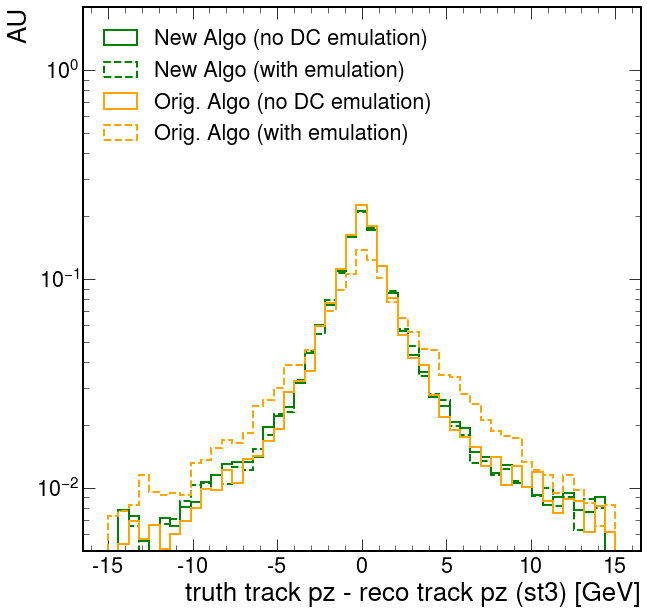

In [194]:
plt.hist(pzDiffsNew_ne, bins=np.linspace(-15, 15, 50), color='g', lw=2, density=True, histtype='step', label='New Algo (no DC emulation)')
plt.hist(pzDiffsNew, bins=np.linspace(-15, 15, 50), color='g', linestyle='--', lw=2, density=True, histtype='step', label='New Algo (with emulation)')
plt.hist(pzDiffsOLD_ne, bins=np.linspace(-15, 15, 50), color='orange', lw=2, density=True, histtype='step', label='Orig. Algo (no DC emulation)')
plt.hist(pzDiffsOLD, bins=np.linspace(-15, 15, 50), color='orange', linestyle='--', lw=2, density=True, histtype='step', label='Orig. Algo (with emulation)')
plt.yscale('log')
plt.ylim([.005,2])
plt.ylabel('AU')
plt.xlabel('truth track pz - reco track pz (st3) [GeV]')
plt.legend(loc='upper left')

In [195]:
pxDiffsNew = [e for e in pdf_withEmbedNew["TTpxDiff"].to_numpy() if e > -999.]
pxDiffsNew_ne = [e for e in pdf_withEmbedNew_noEmu["TTpxDiff"].to_numpy() if e > -999.]
pxDiffsOLD = [e for e in pdf_withEmbedOld["TTpxDiff"].to_numpy() if e > -999.]
pxDiffsOLD_ne = [e for e in pdf_withEmbedOld_noEmu["TTpxDiff"].to_numpy() if e > -999.]

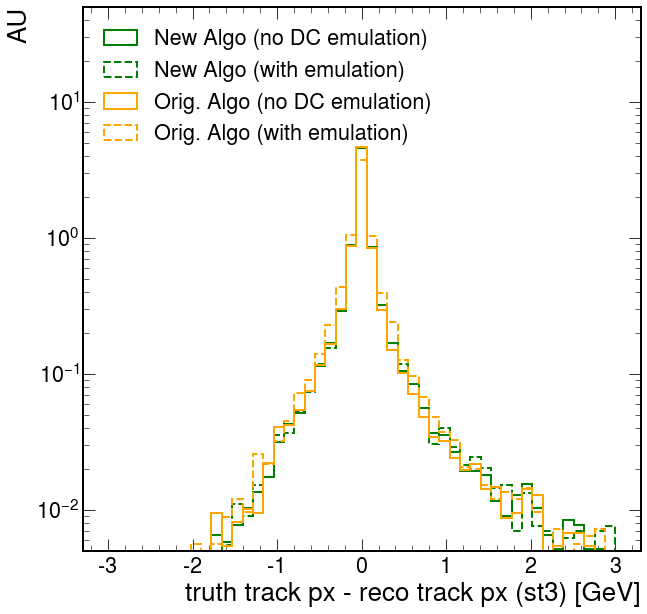

In [196]:
plt.hist(pxDiffsNew_ne, bins=np.linspace(-3, 3, 50), color='g', lw=2, density=True, histtype='step', label='New Algo (no DC emulation)')
plt.hist(pxDiffsNew, bins=np.linspace(-3, 3, 50), color='g', linestyle='--', lw=2, density=True, histtype='step', label='New Algo (with emulation)')
plt.hist(pxDiffsOLD_ne, bins=np.linspace(-3, 3, 50), color='orange', lw=2, density=True, histtype='step', label='Orig. Algo (no DC emulation)')
plt.hist(pxDiffsOLD, bins=np.linspace(-3, 3, 50), color='orange', linestyle='--', lw=2, density=True, histtype='step', label='Orig. Algo (with emulation)')
plt.yscale('log')
plt.ylim([.005,50])
plt.ylabel('AU')
plt.xlabel('truth track px - reco track px (st3) [GeV]')
plt.legend(loc='upper left')

In [197]:
pyDiffsNew = [e for e in pdf_withEmbedNew["TTpyDiff"].to_numpy() if e > -999.]
pyDiffsNew_ne = [e for e in pdf_withEmbedNew_noEmu["TTpyDiff"].to_numpy() if e > -999.]
pyDiffsOLD = [e for e in pdf_withEmbedOld["TTpyDiff"].to_numpy() if e > -999.]
pyDiffsOLD_ne = [e for e in pdf_withEmbedOld_noEmu["TTpyDiff"].to_numpy() if e > -999.]

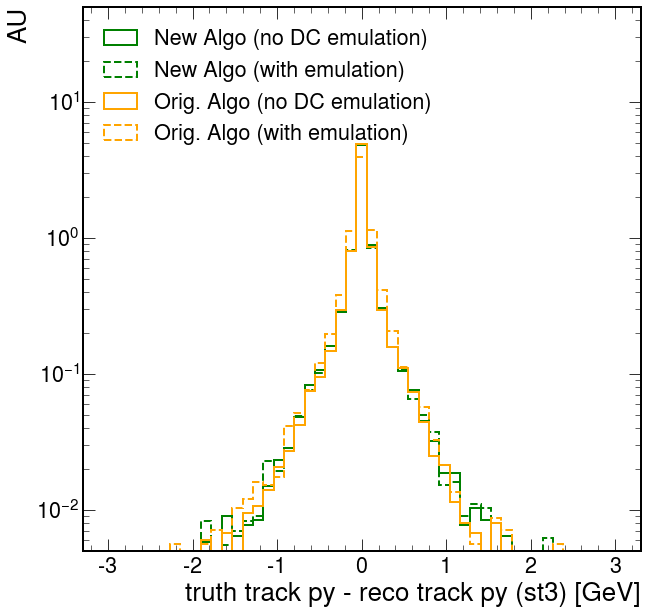

In [198]:
plt.hist(pyDiffsNew_ne, bins=np.linspace(-3, 3, 50), color='g', lw=2, density=True, histtype='step', label='New Algo (no DC emulation)')
plt.hist(pyDiffsNew, bins=np.linspace(-3, 3, 50), color='g', linestyle='--', lw=2, density=True, histtype='step', label='New Algo (with emulation)')
plt.hist(pyDiffsOLD_ne, bins=np.linspace(-3, 3, 50), color='orange', lw=2, density=True, histtype='step', label='Orig. Algo (no DC emulation)')
plt.hist(pyDiffsOLD, bins=np.linspace(-3, 3, 50), color='orange', linestyle='--', lw=2, density=True, histtype='step', label='Orig. Algo (with emulation)')
plt.yscale('log')
plt.ylim([.005,50])
plt.ylabel('AU')
plt.xlabel('truth track py - reco track py (st3) [GeV]')
plt.legend(loc='upper left')

<ipython-input-477-ec81b230c0bf>:10: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoOld[0][:40], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')


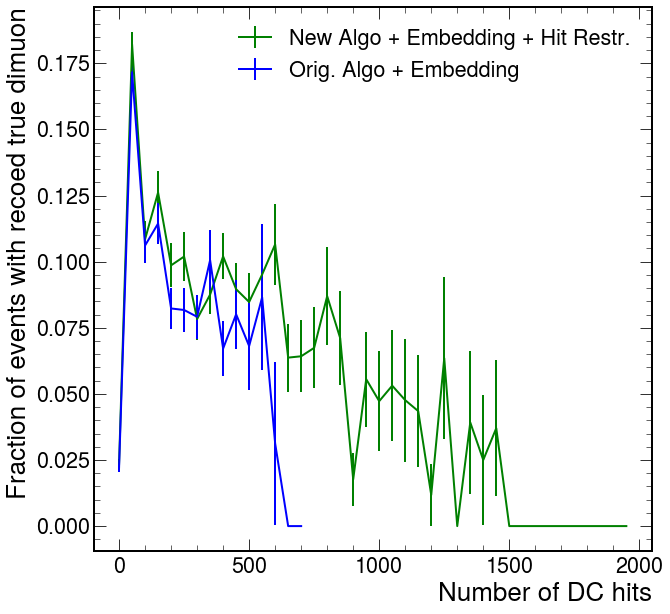

In [477]:
#testInfoRes = EffPlotInfo(pdf_withEmbedNew_HitRes["nDCHits"].to_numpy(), pdf_withEmbedNew_HitRes["recoTDM"].to_numpy(), binsDef = np.linspace(0,2000,41))
testInfoRes = EffPlotInfo(pdf_withEmbedNew["nDCHits"].to_numpy(), pdf_withEmbedNew["mainDMRecoed"].to_numpy(), binsDef = np.linspace(0,2000,41))
testInfoOld = EffPlotInfo(pdf_withEmbedOld_HitRes["nDCHits"].to_numpy(), pdf_withEmbedOld_HitRes["mainDMRecoed"].to_numpy(), binsDef = np.linspace(0,2000,41))

#testInfoRes = EffPlotInfo(pdf_withEmbedNew_HitRes["nDCHits"].to_numpy(), pdf_withEmbedNew_HitRes["totalTime"].to_numpy())
#testInfoOld = EffPlotInfo(pdf_withEmbedOld_HitRes["nDCHits"].to_numpy(), pdf_withEmbedOld_HitRes["totalTime"].to_numpy())


plt.errorbar(testInfoRes[0][:40], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
plt.errorbar(testInfoOld[0][:40], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')
plt.xlabel('Number of DC hits')
plt.ylabel('Fraction of events with recoed true dimuon')
plt.legend(loc='upper right')

<ipython-input-481-3483c5598462>:10: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoRes[0][:50], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
<ipython-input-481-3483c5598462>:11: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoOld[0][:50], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')


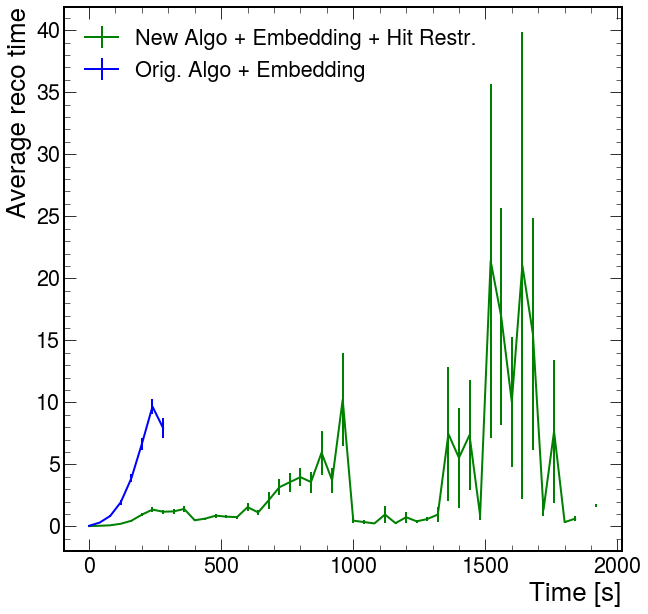

In [481]:
Xvals = "n_hits_d0"
#testInfoRes = EffPlotInfo(pdf_withEmbedNew_HitRes[Xvals].to_numpy(), pdf_withEmbedNew_HitRes["totalTime"].to_numpy(), binsDef = np.linspace(0,2000,51))
testInfoRes = EffPlotInfo(pdf_withEmbedNew[Xvals].to_numpy(), pdf_withEmbedNew["totalTime"].to_numpy(), binsDef = np.linspace(0,2000,51))
testInfoOld = EffPlotInfo(pdf_withEmbedOld_HitRes[Xvals].to_numpy(), pdf_withEmbedOld_HitRes["totalTime"].to_numpy(), binsDef = np.linspace(0,2000,51))

#testInfoRes = EffPlotInfo(pdf_withEmbedNew_HitRes["nDCHits"].to_numpy(), pdf_withEmbedNew_HitRes["totalTime"].to_numpy())
#testInfoOld = EffPlotInfo(pdf_withEmbedOld_HitRes["nDCHits"].to_numpy(), pdf_withEmbedOld_HitRes["totalTime"].to_numpy())


plt.errorbar(testInfoRes[0][:50], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
plt.errorbar(testInfoOld[0][:50], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')
plt.xlabel('Time [s]')
plt.ylabel('Average reco time')
plt.legend(loc='upper left')

Text(1, 0, 'Number of DC hits')

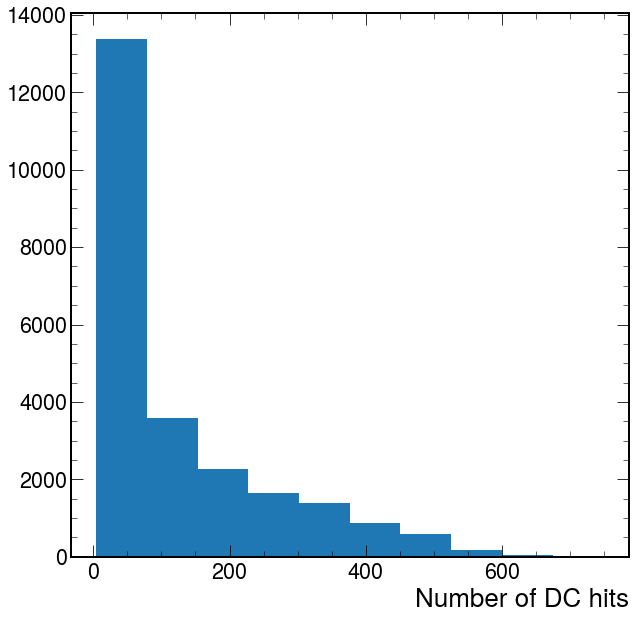

In [226]:
plt.hist(pdf_withEmbedNew_HitRes["nDCHits"].to_numpy())
plt.xlabel('Number of DC hits')

In [22]:
print(pdf_withEmbedNew_HitRes["nFakes"].to_numpy().sum())
print(pdf_withEmbedOld_HitRes["nFakes"].to_numpy().sum())

362
371


<ipython-input-101-262d43fd326d>:8: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoRes[0][:20], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
<ipython-input-101-262d43fd326d>:9: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoOld[0][:20], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')


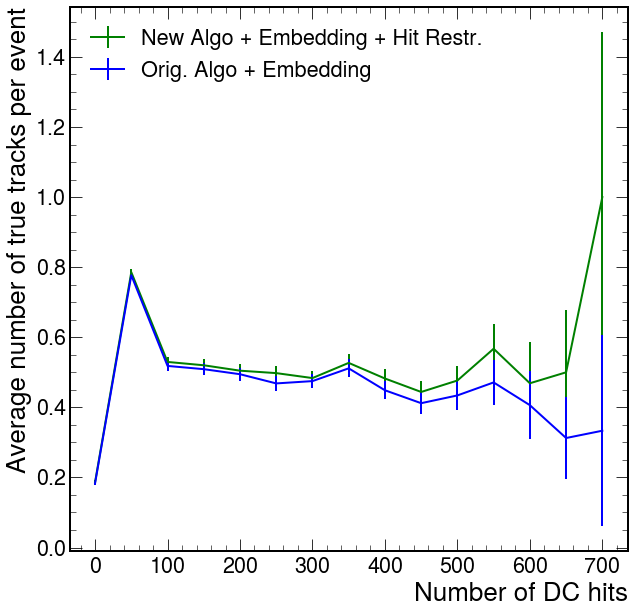

In [101]:
testInfoRes = EffPlotInfo(pdf_withEmbedNew_HitRes["nDCHits"].to_numpy(), pdf_withEmbedNew_HitRes["nTrues"].to_numpy(), binsDef = np.linspace(0,1000,21))
testInfoOld = EffPlotInfo(pdf_withEmbedOld_HitRes["nDCHits"].to_numpy(), pdf_withEmbedOld_HitRes["nTrues"].to_numpy(), binsDef = np.linspace(0,1000,21))

#testInfoRes = EffPlotInfo(pdf_withEmbedNew_HitRes["nDCHits"].to_numpy(), pdf_withEmbedNew_HitRes["totalTime"].to_numpy())
#testInfoOld = EffPlotInfo(pdf_withEmbedOld_HitRes["nDCHits"].to_numpy(), pdf_withEmbedOld_HitRes["totalTime"].to_numpy())


plt.errorbar(testInfoRes[0][:20], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
plt.errorbar(testInfoOld[0][:20], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')
plt.xlabel('Number of DC hits')
plt.ylabel('Average number of true tracks per event')
plt.legend(loc='upper left')

In [81]:
print(pdf_withEmbedNew_HitRes["nTrues"].to_numpy().sum())
print(pdf_withEmbedOld_HitRes["nTrues"].to_numpy().sum())

11518
11270


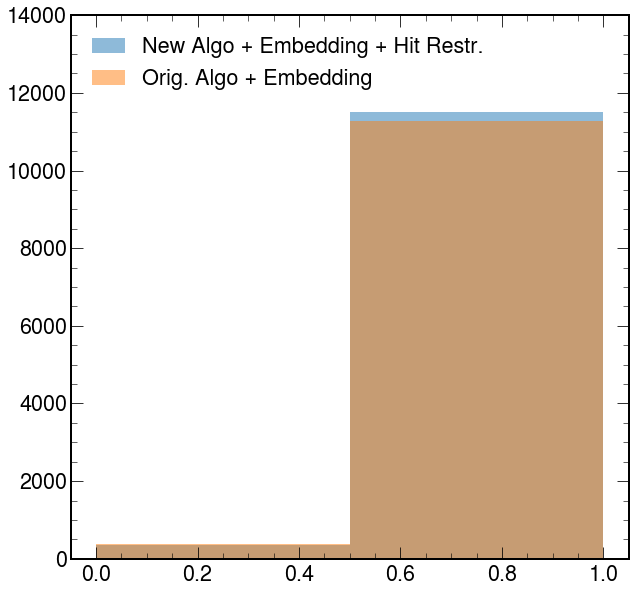

In [97]:
plt.hist([0,.5],[0,.5,1],  weights=[pdf_withEmbedNew_HitRes["nFakes"].to_numpy().sum(), pdf_withEmbedNew_HitRes["nTrues"].to_numpy().sum()], alpha=0.5, label='New Algo + Embedding + Hit Restr.')
plt.hist([0,.5],[0,.5,1],  weights=[pdf_withEmbedOld_HitRes["nFakes"].to_numpy().sum(), pdf_withEmbedOld_HitRes["nTrues"].to_numpy().sum()], alpha=0.5, label='Orig. Algo + Embedding')
#plt.yscale("log")
#plt.ylim([100,100000])
plt.ylim([0,14000])
plt.legend(loc='upper left')

In [161]:
print(pdf_withEmbedNew_HitRes["TTpzDiff1"].to_numpy())

[ 9.85593796e-01 -1.00000000e+03 -1.00000000e+03 ... -1.00000000e+03
 -1.00000000e+03 -1.00000000e+03]


In [170]:
pzDiffsNew = [e for e in pdf_withEmbedNew["TTpzDiff1"].to_numpy() if e > -999.]+[e for e in pdf_withEmbedNew["TTpzDiff2"].to_numpy() if e > -999.]
pzDiffsNew_HR = [e for e in pdf_withEmbedNew_HitRes["TTpzDiff1"].to_numpy() if e > -999.]+[e for e in pdf_withEmbedNew_HitRes["TTpzDiff2"].to_numpy() if e > -999.]
pzDiffsOLD = [e for e in pdf_withEmbedOld["TTpzDiff1"].to_numpy() if e > -999.]+[e for e in pdf_withEmbedOld["TTpzDiff2"].to_numpy() if e > -999.]

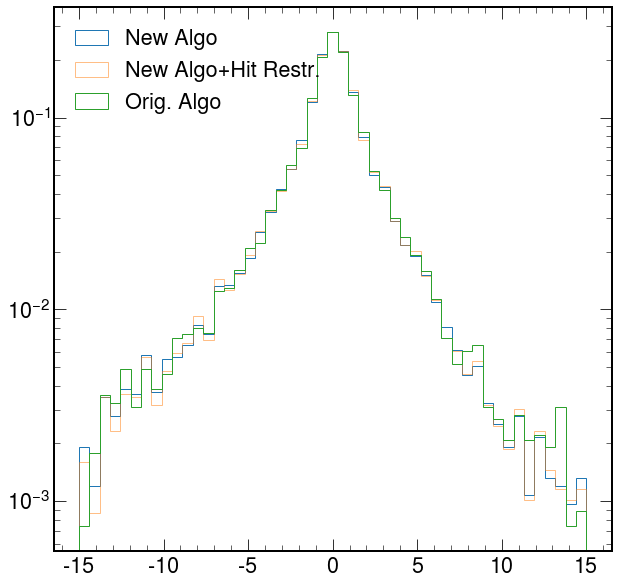

In [180]:
plt.hist(pzDiffsNew, bins=np.linspace(-15, 15, 50), density=True, histtype='step', label='New Algo')
plt.hist(pzDiffsNew_HR, bins=np.linspace(-15, 15, 50), alpha=0.5, density=True, histtype='step', label='New Algo+Hit Restr.')
plt.hist(pzDiffsOLD, bins=np.linspace(-15, 15, 50), density=True, histtype='step', label='Orig. Algo')
plt.yscale('log')
plt.legend(loc='upper left')

In [184]:
print(np.sum(pzDiffsNew))
print(np.sum(pzDiffsNew_HR))
print(np.sum(pzDiffsOLD))

-9380.295612335205
-7121.568781852722
-6653.864192008972


In [339]:
ndm = ROOT.TH1F("ndm","",25,0,1000)
nTdm = ROOT.TH1F("nTdm","",25,0,1000)
ndmOld = ROOT.TH1F("ndmOld","",25,0,1000)
nTdmOld = ROOT.TH1F("nTdmOld","",25,0,1000)

Warning in <TROOT::Append>: Replacing existing TH1: ndm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nTdm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ndmOld (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nTdmOld (Potential memory leak).


In [340]:
#print(len(pdf_withEmbedNew["nDCHits"].to_numpy()))
for i in range(len(pdf_withEmbedNew["nDCHits"].to_numpy())):
    #if(pdf_withEmbedNew["n_dimuons"].to_numpy()[i]>0):
    #    print('ndm',pdf_withEmbedNew["n_dimuons"].to_numpy()[i])
    #    print('recoed',pdf_withEmbedNew["recoTDM"].to_numpy()[i])
    #    print(pdf_withEmbedNew["nDCHits"].to_numpy()[i])
    if(pdf_withEmbedNew["recoTDM"].to_numpy()[i]==1):
    #    print('filled2')
        nTdm.Fill(pdf_withEmbedNew["nDCHits"].to_numpy()[i])
    for dm in range(pdf_withEmbedNew["n_dimuons"].to_numpy()[i]):
    #    print('filled')
        ndm.Fill(pdf_withEmbedNew["nDCHits"].to_numpy()[i])

In [341]:
#print(len(pdf_withEmbedNew["nDCHits"].to_numpy()))
for i in range(len(pdf_withEmbedOld["nDCHits"].to_numpy())):
    if(pdf_withEmbedOld["recoTDM"].to_numpy()[i]==1):
        nTdmOld.Fill(pdf_withEmbedOld["nDCHits"].to_numpy()[i])
    for dm in range(pdf_withEmbedOld["n_dimuons"].to_numpy()[i]):
    #    print('filled')
        ndmOld.Fill(pdf_withEmbedOld["nDCHits"].to_numpy()[i])

In [342]:
xs = []
ys = []
xsOld = []
ysOld = []
for i in range(25):
    xs.append(ndm.GetBinCenter(i+1))
    if(ndm.GetBinContent(i+1) > 0):
        ys.append(nTdm.GetBinContent(i+1)/ndm.GetBinContent(i+1))
    else:
        ys.append(0)
    xsOld.append(ndmOld.GetBinCenter(i+1))
    if(ndmOld.GetBinContent(i+1) > 0):
        ysOld.append(nTdmOld.GetBinContent(i+1)/ndmOld.GetBinContent(i+1))
    else:
        ysOld.append(0)

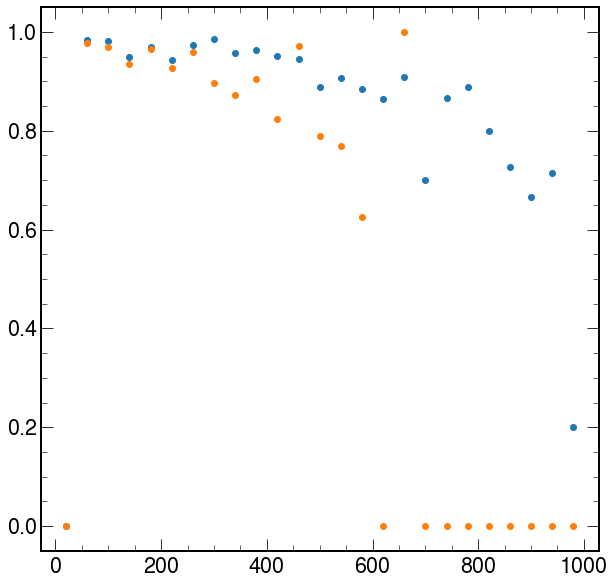

In [343]:
plt.scatter(xs, ys)
plt.scatter(xsOld, ysOld)

<ipython-input-374-ecc7252f7050>:8: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoRes[0][:20], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
<ipython-input-374-ecc7252f7050>:9: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(testInfoOld[0][:20], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')


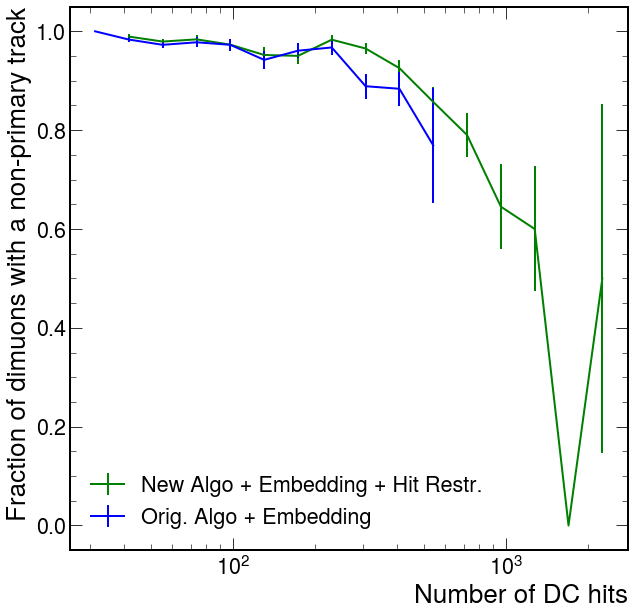

In [374]:
#testInfoRes = EffPlotInfo(pdf_withEmbedNew_DMRes["nDCHits"].to_numpy(), pdf_withEmbedNew_DMRes["recoTDM"].to_numpy(), binsDef = np.linspace(0,2000,41))
#testInfoOld = EffPlotInfo(pdf_withEmbedOld_DMRes["nDCHits"].to_numpy(), pdf_withEmbedOld_DMRes["recoTDM"].to_numpy(), binsDef = np.linspace(0,2000,41))

testInfoRes = EffPlotInfo(pdf_withEmbedNew_DMRes["nDCHits"].to_numpy(), pdf_withEmbedNew_DMRes["recoTDM"].to_numpy(), binsDef=np.logspace(np.log10(10),np.log10(3000.0), 21))
testInfoOld = EffPlotInfo(pdf_withEmbedOld_DMRes["nDCHits"].to_numpy(), pdf_withEmbedOld_DMRes["recoTDM"].to_numpy(), binsDef=np.logspace(np.log10(10),np.log10(3000.0), 21))


plt.errorbar(testInfoRes[0][:20], testInfoRes[1], testInfoRes[2]/np.sqrt(testInfoRes[3]), color='g', lw=2, label='New Algo + Embedding + Hit Restr.')
plt.errorbar(testInfoOld[0][:20], testInfoOld[1], testInfoOld[2]/np.sqrt(testInfoOld[3]), color='b', lw=2, label='Orig. Algo + Embedding')
plt.xlabel('Number of DC hits')
plt.ylabel('Fraction of dimuons with a non-primary track')
plt.xscale("log")
plt.legend(loc='lower left')